# MTGGoldfish Scraping

In [1]:
#Basic Python
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import pickle
import requests

#API
import requests
from bs4 import BeautifulSoup

In [30]:
def pricify(card, expansion, foiling):
    '''Returns price history for a card name, expansion, and foiling'''
    
    if foiling.lower() == 'foil' or foiling.lower() == 'yes':
        foil_option = ':Foil'
        foil_label = 'Foil'
    else:
        foil_option = ''
        foil_label = 'Non Foil'
    #URL to BS4 to string
    url = 'https://www.mtggoldfish.com/price/{}/{}#paper'.format(expansion.replace(' ', '+')+foil_option, card.replace(' ', '+'))
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    script = soup.find_all("script")
    
    #list of strings of items
    result = []
    [result.append(str(s)) for s in script]
    #return result
    
    #which compartment index is the pricing data
    index = [idx for idx, s in enumerate(result) if 'var d =' in s][0]
    data = result[index]
    #where exactly is the date and price data
    price_index = [data.find('var d ='), data.find('g = new Dygraph')]
    
    #cleaning up price and date data
    messy = data[data.find('var d ='): data.find('g = new Dygraph')]
    cleaned = messy.replace('var d = "Date,{}";\n  '.format(card), '').replace('d += "\\n', '').replace('";\n  ', '|').replace('";\n\n', '')

    cleaned_list = cleaned.split("|")
    price_history = pd.DataFrame([i.split(',') for i in cleaned_list], columns = ['date', 'price'])
    price_history['date'] = pd.to_datetime(price_history['date'], format = '%Y-%m-%d')
    price_history['price'] = price_history['price'].astype(float)
    price_history['expansion'] = expansion
    price_history['foil'] = foil_label
    
    return price_history

In [34]:
rhystic_study = pricify('Rhystic Study', 'Prophecy', 'Foil')
rhystic_study

,date,price,expansion,foil
0,2014-03-25,20.66,Prophecy,Foil
1,2014-03-26,20.64,Prophecy,Foil
2,2014-03-27,20.64,Prophecy,Foil
3,2014-03-28,20.64,Prophecy,Foil
4,2014-03-29,20.64,Prophecy,Foil
...,...,...,...,...
2552,2021-05-26,299.99,Prophecy,Foil
2553,2021-05-27,350.00,Prophecy,Foil
2554,2021-05-28,400.00,Prophecy,Foil
2555,2021-05-29,400.00,Prophecy,Foil


<AxesSubplot:xlabel='date'>

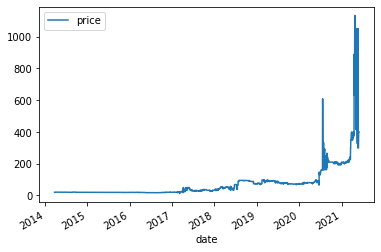

In [36]:
rhystic_study.plot('date', 'price')

In [43]:
from bokeh.plotting import figure, show
from bokeh.models.tools import HoverTool

x = rhystic_study.date
y = rhystic_study.price

# create a new plot with a title and axis labels
p = figure(title="Rhystic Study Price", x_axis_label="Date", y_axis_label="Price")

# add a line renderer with legend and line thickness
p.line(x, y, legend_label="Price.", line_width=2)

p.add_tools(HoverTool(
    tooltips=[('(date, price)', '(@x{%F}, @y)')],
    formatters={'@x': 'datetime'}))

# show the results
show(p)


In [ ]:
HoverTool(tooltips=[('date', '@DateTime{%F}')],
          formatters={'@DateTime': 'datetime'})